In [ ]:
#1번-unconditional variance of a(t)가 positive 하려면
<a(t)=at, F(t-1)=이전 조건들, st=시그마 t, et= 엡실론 t, A0=알파0, A1=알파1, A2=알파2> 로 표기

var(at)=E(at^2)
=E[E(at^2|F(t-1))]
=E[E[(st^2)*(et^2)|F(t-1)]]
=E[st^2*E(et^2|F(t-1))]  #since st^2 is constant when previous conditions are known.
=E(st^2)                 #since E(et^2)=var(et^2)=1(F(t-1)과 관계 없이), since et~iid N(0,1)
=E(A0+A1*a(t-1)^2+A2*a(t-2)^2)
=A0+A1*E(a(t-1)^2)+A2*E(a(t-2)^2)
=A0+A1*var(a(t-1))+A2*var(a(t-2)) #since E(at^2)=E(at^2-E(at)^2)=var(at), since E(at)=E[E(at|F(t-1))]=E[st*E(et)]=0

Since var(at) is not change over time, var(at)=var(a(t-1))=var(a(t-2))
=> (1-A1-A2)*var(at)=A0, var(at)=A0/(1-A1-A2)

So, "A0 > 0 and A1+A2 < 1" is required to make the unconditional variance of a(t) positive.

In [76]:
#2번-estimate GARCH(1,1) model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
data=pd.read_excel("BTC-USD.xlsx", engine = "openpyxl", index_col=0)
data1=data.iloc[:,[3]]
data_log=np.log(data1).diff().dropna()
garch = arch_model(data_log, mean='Zero',vol='garch', p=1,q=1, rescale='True',dist="Normal")
garch_fit=garch.fit(update_freq=5)
print(garch_fit.summary())

Iteration:      5,   Func. Count:     29,   Neg. LLF: -707.9641139742591
Iteration:     10,   Func. Count:     54,   Neg. LLF: -708.9994863843874
Optimization terminated successfully    (Exit mode 0)
            Current function value: -709.0004269552617
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 11
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                      GARCH   Log-Likelihood:                709.000
Distribution:                  Normal   AIC:                          -1412.00
Method:            Maximum Likelihood   BIC:                          -1400.33
                                        No. Observations:                  361
Date:                Tue, May 25 2021   Df Residuals:                      361
Time:       

(18400.0, 18627.0)

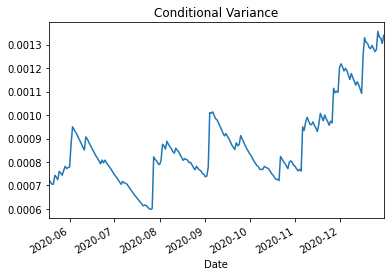

In [74]:
#2번-plot conditional variance of the model
#plot conditional variance of 2020
garch_fit1=garch_fit
fig, ax = plt.subplots(1, 1)
var = garch_fit1.conditional_volatility['2020'] ** 2.0
subplot = var.plot(ax=ax, title="Conditional Variance")
subplot.set_xlim(var.index[0], var.index[-1])

(18628.0, 18764.0)

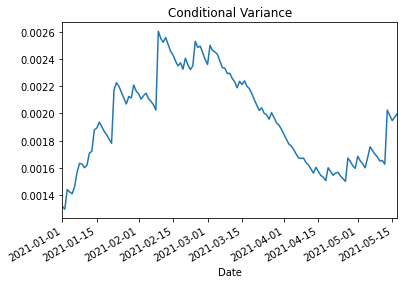

In [79]:
#plot conditional variance of 2021
garch_fit2=garch_fit
fig, ax = plt.subplots(1, 1)
var2 = garch_fit2.conditional_volatility['2021'] ** 2.0
subplot2 = var2.plot(ax=ax, title="Conditional Variance")
subplot2.set_xlim(var2.index[0], var2.index[-1])